In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mag = np.load("../output/PerpSTT-2025-05-16-222816/mag.npy") # Simulating this took 1692.62 s

In [26]:
switching_indicies = []
for i, m in enumerate(mag):
    if np.sign(m[0, 2]) != np.sign(m[-1, 2]):
        switching_indicies.append(i)

print(f"Amount of runs resulted in switching: {len(switching_indicies)}/{len(mag)}")

Amount of runs resulted in switching: 698/1000


In [27]:
v = np.load("../output/PerpSTT-2025-05-16-222816/voltages.npy")

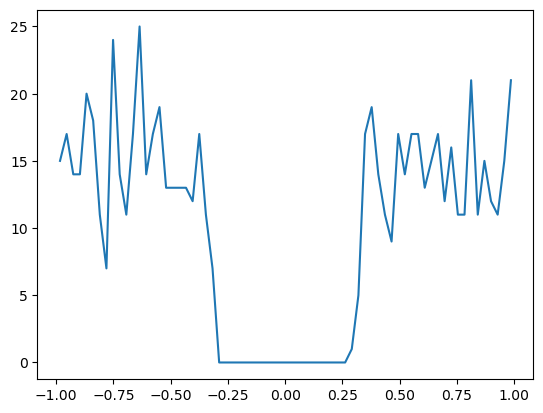

In [32]:
switching_voltages = np.take(v, switching_indicies)

p, x = np.histogram(switching_voltages, bins=int(len(switching_indicies)/10)) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers

plt.plot(x, p)

In [34]:
time_series = np.load("../output/PerpSTT-2025-05-16-222816/time_series.npy")

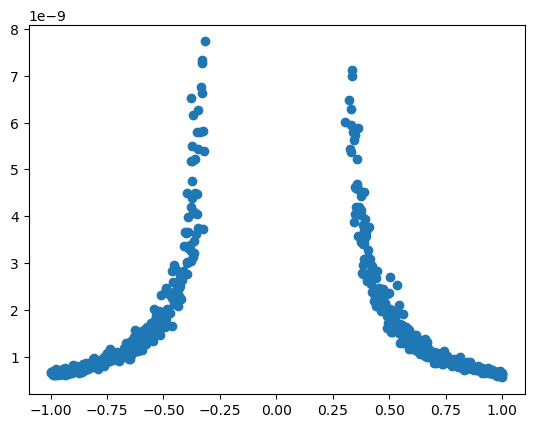

In [36]:
switching_time = []
for i in switching_indicies:
    mz_abs = np.abs(mag[i, :, 2])
    mz_min_idx = np.argmin(mz_abs)
    switching_time.append((v[i], time_series[mz_min_idx]))

x, y = zip(*switching_time)
plt.scatter(x, y)